In [ ]:
import numpy as np
import pandas as pd

#Library for plotting
import matplotlib.pyplot as plt

#Library of dataset
from sklearn.datasets import fetch_olivetti_faces

#Library for the 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics


In [ ]:
import seaborn as sns

plt.style.use('seaborn')
sns.set_style('darkgrid')

In [ ]:
# Loading image data and target vector
data,target = fetch_olivetti_faces(return_X_y=True, shuffle=False)

# Reshaping data to that of an image
img_data = data.reshape(400, 64, 64)
features = data.shape[1]


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
# Printing relevant information about the dataset
print("Number of images in the dataset = {}.".format(len(img_data)))
print("Number of target faces in the dataset = {}.".format(len(np.unique(target))))
print("Size of each image = {} x {}".format(img_data.shape[1], img_data.shape[2]))

Number of images in the dataset = 400.
Number of target faces in the dataset = 40.
Size of each image = 64 x 64


In [ ]:
# Function for showing the 40 different faces in dataset
def show_distinct_faces(images, unique_ids):
  fig, axarr = plt.subplots(nrows = 4, ncols = 10, figsize = (18,9))
  axarr = axarr.flatten()

  for id in unique_ids:
    img_index = id*10
    axarr[id].imshow(images[img_index], cmap = 'gray')
    axarr[id].set_xticks([])
    axarr[id].set_yticks([])
    axarr[id].set_title("Face ID: {}".format(id))
plt.suptitle("Types of distinct faces in the dataset.")

Text(0.5, 0.98, 'Types of distinct faces in the dataset.')

<Figure size 576x396 with 0 Axes>

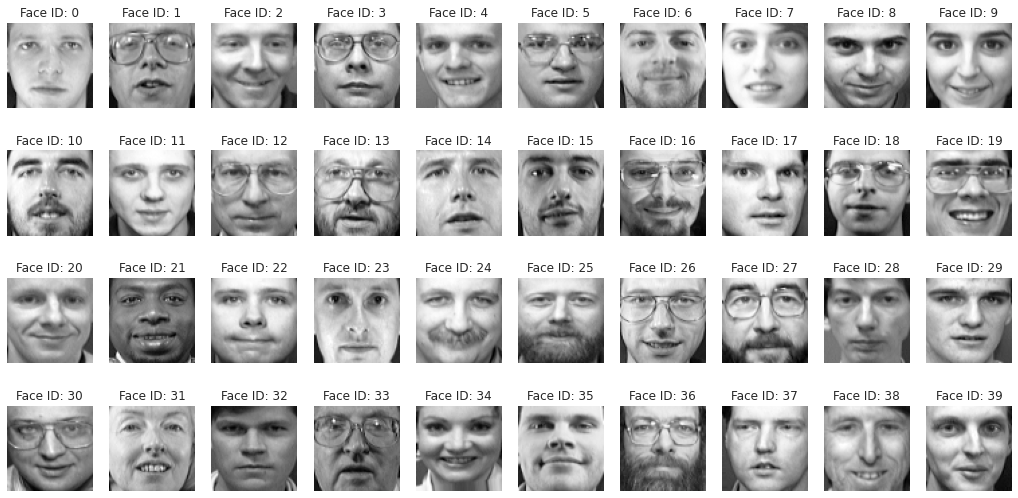

In [ ]:
show_distinct_faces(img_data, np.unique(target))

In [ ]:
# Splitting dataset into train and test set with 30% test split.
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.3, stratify = target, random_state = 1)
print("Training data size " + str(len(X_train)))

Training data size 280


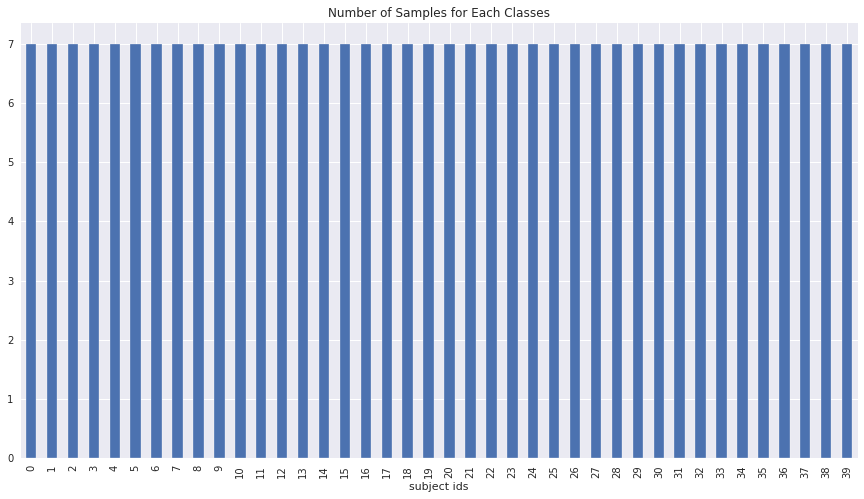

In [ ]:
# Showing number of samples in every train category.
y_frame=pd.DataFrame()
y_frame['subject ids']=Y_train

y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [ ]:
%%capture
!pip install mglearn
import mglearn

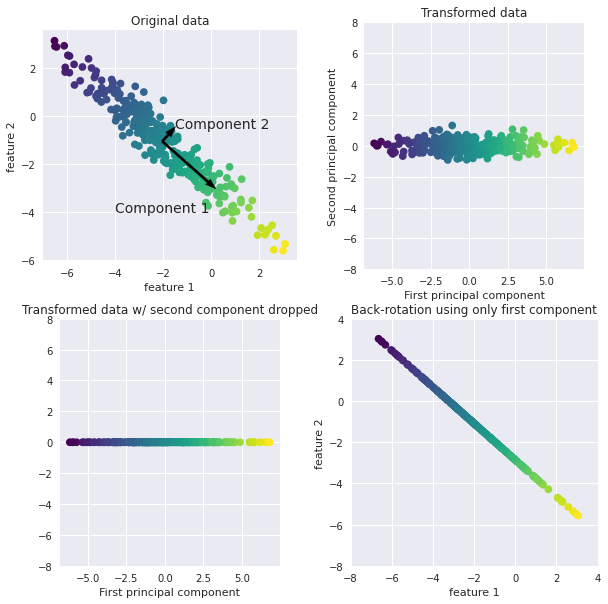

In [ ]:
mglearn.plots.plot_pca_illustration()

Plotting the correlation between the original features [4096 X 4096]

In [ ]:
test_data = pd.DataFrame(data=data)
test_data.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4056,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,1.000000,0.943217,0.814868,0.702582,0.609224,0.556316,0.525357,0.503028,0.473597,0.441116,0.409536,0.379914,0.367114,0.356675,0.353849,0.350199,0.343326,0.339340,0.327926,0.315524,0.306194,0.298809,0.286571,0.273693,0.265589,0.272831,0.261234,0.252661,0.250303,0.243220,0.242839,0.234755,0.235972,0.235084,0.230051,0.225321,0.208684,0.197299,0.177331,0.163082,...,0.197439,0.204363,0.207411,0.214066,0.201438,0.187352,0.181707,0.156866,0.141354,0.120511,0.122014,0.113201,0.100951,0.084359,0.072896,0.061565,0.046282,0.026949,0.002760,-0.009547,-0.047381,-0.070182,-0.091478,-0.125792,-0.145720,-0.157597,-0.186405,-0.184992,-0.200562,-0.233401,-0.239971,-0.260497,-0.272071,-0.239309,-0.223129,-0.243603,-0.211231,-0.185307,-0.181182,-0.143213
1,0.943217,1.000000,0.924430,0.804965,0.697400,0.641778,0.604667,0.571075,0.535635,0.499481,0.465023,0.432294,0.413324,0.400132,0.394376,0.392311,0.388662,0.388783,0.377051,0.364578,0.355306,0.349334,0.340624,0.328791,0.318820,0.326909,0.313333,0.304035,0.302171,0.294376,0.288577,0.277681,0.282128,0.281880,0.276835,0.270461,0.255310,0.245234,0.223769,0.209907,...,0.234159,0.238424,0.234036,0.238881,0.217481,0.204501,0.190764,0.166352,0.152697,0.134921,0.131337,0.125389,0.112992,0.099204,0.088749,0.083220,0.066878,0.053155,0.032086,0.013265,-0.017607,-0.038489,-0.065709,-0.106878,-0.127073,-0.139221,-0.160987,-0.167672,-0.180787,-0.226235,-0.243067,-0.260885,-0.267603,-0.245155,-0.252350,-0.282713,-0.264153,-0.251341,-0.243453,-0.197476
2,0.814868,0.924430,1.000000,0.937977,0.826491,0.757834,0.710661,0.670561,0.627330,0.583468,0.544366,0.513141,0.490251,0.475776,0.466317,0.461546,0.455832,0.454969,0.442891,0.429695,0.417593,0.408490,0.399323,0.386662,0.376665,0.379609,0.362634,0.352628,0.352047,0.343920,0.334556,0.321525,0.328923,0.326793,0.320113,0.311727,0.299600,0.288397,0.266266,0.248120,...,0.232739,0.235913,0.222701,0.217760,0.192052,0.171730,0.148730,0.120667,0.109752,0.094898,0.086428,0.077957,0.074162,0.066578,0.062807,0.064602,0.044803,0.035455,0.015850,0.001376,-0.020138,-0.043459,-0.083326,-0.117885,-0.137867,-0.148053,-0.155172,-0.167134,-0.191898,-0.230885,-0.262965,-0.289152,-0.302656,-0.284168,-0.308511,-0.344060,-0.338443,-0.333210,-0.317073,-0.269769
3,0.702582,0.804965,0.937977,1.000000,0.937839,0.860794,0.805494,0.758328,0.710537,0.655427,0.613042,0.580549,0.556244,0.540387,0.528208,0.520954,0.514057,0.513436,0.500323,0.487574,0.472212,0.460394,0.450330,0.437439,0.430473,0.428075,0.407470,0.397650,0.395840,0.385760,0.372590,0.360076,0.369108,0.363482,0.355927,0.344843,0.333388,0.322239,0.299631,0.277779,...,0.232187,0.229586,0.207669,0.192231,0.165825,0.133724,0.110954,0.079341,0.070978,0.057579,0.051846,0.041972,0.040491,0.038879,0.038341,0.042486,0.029727,0.021678,0.005189,0.000451,-0.021479,-0.047638,-0.093257,-0.126742,-0.154464,-0.155943,-0.161787,-0.167252,-0.200634,-0.219995,-0.256341,-0.289744,-0.306978,-0.309002,-0.339849,-0.371025,-0.372524,-0.383855,-0.368682,-0.323276
4,0.609224,0.697400,0.826491,0.937839,1.000000,0.955308,0.891157,0.834226,0.780323,0.717512,0.673621,0.637624,0.612967,0.596637,0.581645,0.569575,0.562962,0.558805,0.545450,0.533239,0.516099,0.501909,0.490682,0.482816,0.476260,0.470788,0.451773,0.441755,0.437327,0.427096,0.413752,0.399929,0.406054,0.397285,0.388708,0.374072,0.362194,0.352184,0.330015,0.307496,...,0.216997,0.203751,0.184336,0.157445,0.134805,0.098324,0.075582,0.045158,0.032451,0.024430,0.022285,0.009897,0.008629,0.007997,0.006802,0.010328,0.012381,0.007067,-0.009412,-0.010440,-0.038536,-0.063506,-0.101040,-0.129633,-0.158971,-0.150528,-0.166747,-0.165802,-0.184069,-0.188815,-0.229511,-0.267672,-0.282133,-0.295587,-0.343057,-0

### As we can see the correlation between the original features is pretty high whereas the correlation between the selected principal components is very low and almost NULL 

In [ ]:
from sklearn.decomposition import PCA
pca_test=PCA(n_components=10)
pca_test.fit(data)
X_pca=pca_test.transform(data)

In [ ]:
for i,ratio in enumerate(pca_test.explained_variance_ratio_):
  print(f'Variance Explained by PC{i+1} = {ratio*100}')

Variance Explained by PC1 = 23.812726140022278
Variance Explained by PC2 = 13.99397999048233
Variance Explained by PC3 = 7.9686082899570465
Variance Explained by PC4 = 4.998330399394035
Variance Explained by PC5 = 3.6098450422286987
Variance Explained by PC6 = 3.1569357961416245
Variance Explained by PC7 = 2.426833100616932
Variance Explained by PC8 = 2.0363930612802505
Variance Explained by PC9 = 1.9581101834774017
Variance Explained by PC10 = 1.6721202060580254


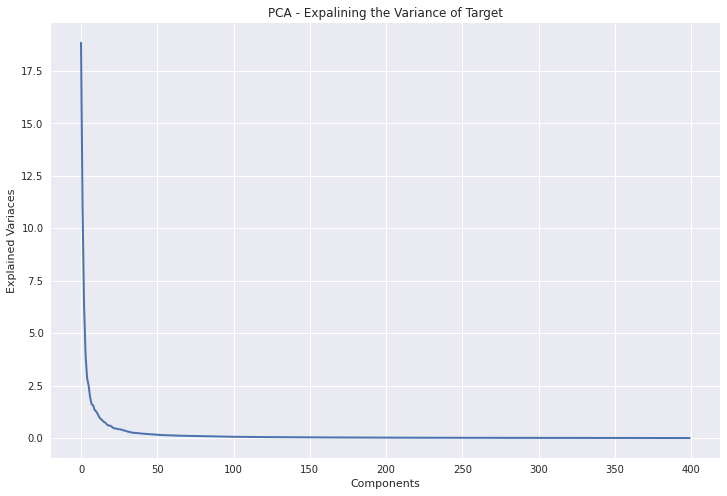

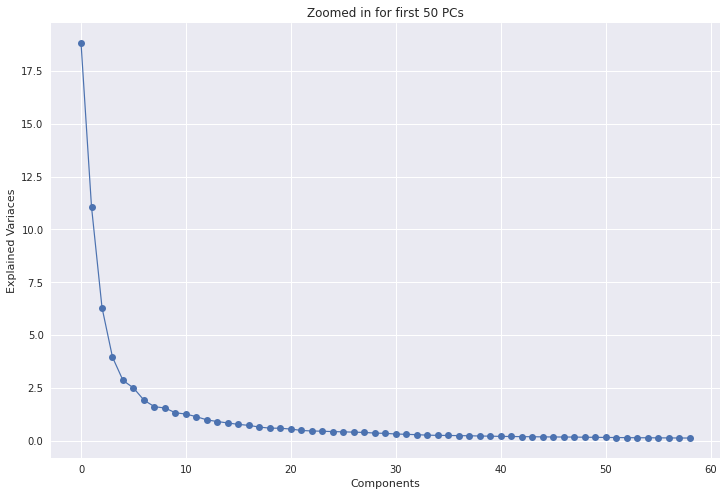

In [ ]:
pca_trial=PCA()
pca_trial.fit(data)

plt.figure(1, figsize=(12,8))
plt.plot(pca_trial.explained_variance_, linewidth=2) 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.title('PCA - Expalining the Variance of Target')

plt.figure(2, figsize=(12,8))
plt.plot(pca_trial.explained_variance_[0:59], linewidth=1.2, marker='o') 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.title('Zoomed in for first 50 PCs')
plt.show()

#### Starting with a 10 PC selection

#### Plotting the Correlation between the selected Principal Components [10 X 10]

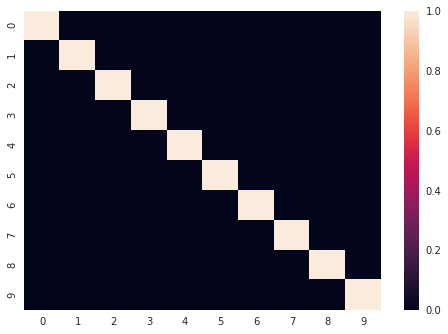

In [ ]:
pca_data = pd.DataFrame(data=X_pca)
corr = pca_data.corr()
sns.heatmap(corr) 

In [ ]:
corr

,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,9.894314e-08,-7.477209e-09,-4.179052e-08,-5.648745e-08,5.575783e-08,3.001230e-08,5.764747e-08,5.186687e-08,-1.491975e-08
1,9.894314e-08,1.000000e+00,4.820974e-07,2.702266e-08,-7.510693e-08,-2.404624e-08,-5.715870e-09,-8.630571e-09,5.014438e-08,-1.624161e-08
2,-7.477209e-09,4.820974e-07,1.000000e+00,2.879730e-07,5.525413e-08,-4.550058e-09,-1.792256e-08,-4.165713e-08,-5.041713e-09,-1.484625e-10
3,-4.179052e-08,2.702266e-08,2.879730e-07,1.000000e+00,1.764899e-07,8.729267e-08,-2.818808e-08,4.984698e-08,-6.609393e-09,-1.279489e-08
4,-5.648745e-08,-7.510693e-08,5.525413e-08,1.764899e-07,1.000000e+00,7.911564e-08,5.658763e-08,7.472672e-08,8.198267e-10,-1.849232e-08
5,5.575783e-08,-2.404624e-08,-4.550058e-09,8.729267e-08,7.911564e-08,1.000000e+00,1.335128e-07,8.549438e-08,3.586584e-08,2.568709e-08
6,3.001230e-08,-5.715870e-09,-1.792256e-08,-2.818808e-08,5.658763e-08,1.335128e-07,1.000000e+00,4.044856e-07,-1.462809e-07,-8.392265e-08
7,5.764747e-08,-8.630571e-09,-4.165713e-08,4.984698e-08,7.472672e-08,8.549438e-08,4.044856e-07,1.000000e+00,4.930608e-07,-4.478929e-08
8,5.186687e-08,5.014438e-08,-5.041713e-09,-6.609393e-09,8.198267e-10,3.586584e-08,-1.462809e-07,4.930608e-07,1.000000e+00,1.026319e-07
9,-1.491975e-08,-1.624161e-08,-1.484625e-10,-1.279489e-08,-1.849232e-08,2.568709e-08,-8.392265e-08,-4.478929e-08,1.026319e-07,1.000000e+00


Text(0.5, 0.98, 'All Eigen Faces')

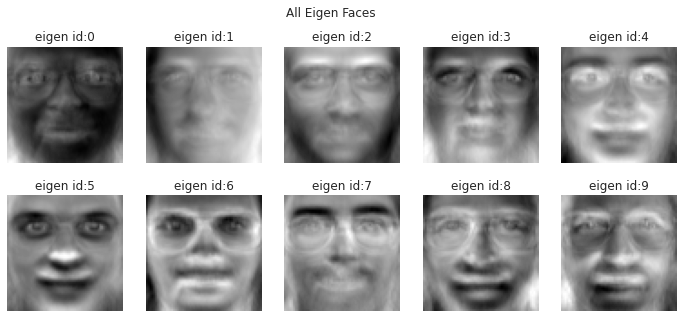

In [ ]:
number_of_eigenfaces=len(pca_test.components_)
eigen_faces=pca_test.components_.reshape((number_of_eigenfaces, img_data.shape[1], img_data.shape[2]))

cols=5
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(12,5))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

###Taking 25 components next

Text(0.5, 0.98, 'All Eigen Faces')

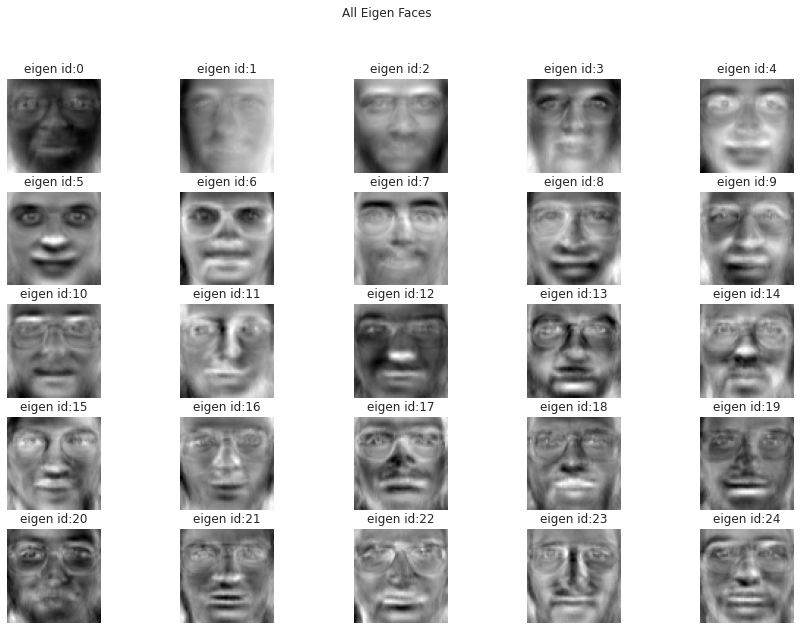

In [ ]:
pca_test=PCA(n_components=25)
pca_test.fit(data)
X_pca=pca_test.transform(data)
number_of_eigenfaces=len(pca_test.components_)
eigen_faces=pca_test.components_.reshape((number_of_eigenfaces, img_data.shape[1], img_data.shape[2]))

cols=5
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,10))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

### As we can see the variance of target explained by the componenets later than 50 is very low and we fail to see any significant change after 45 components, Selecting 50 Principal Components as the features for the classifier

In [ ]:
n_components = 50
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)
Train_PCA = pca.transform(X_train)
Test_PCA = pca.transform(X_test)

In [ ]:
Test_PCA.shape

(120, 50)

Text(0.5, 1.0, 'Average Face')

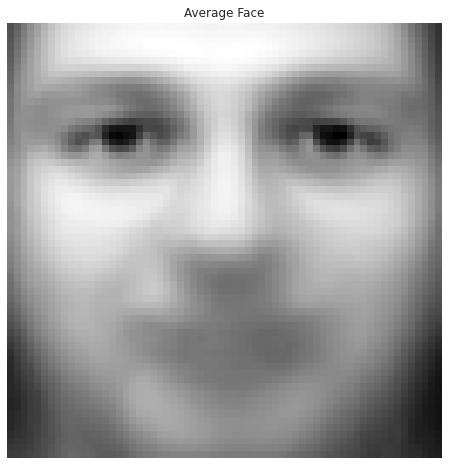

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

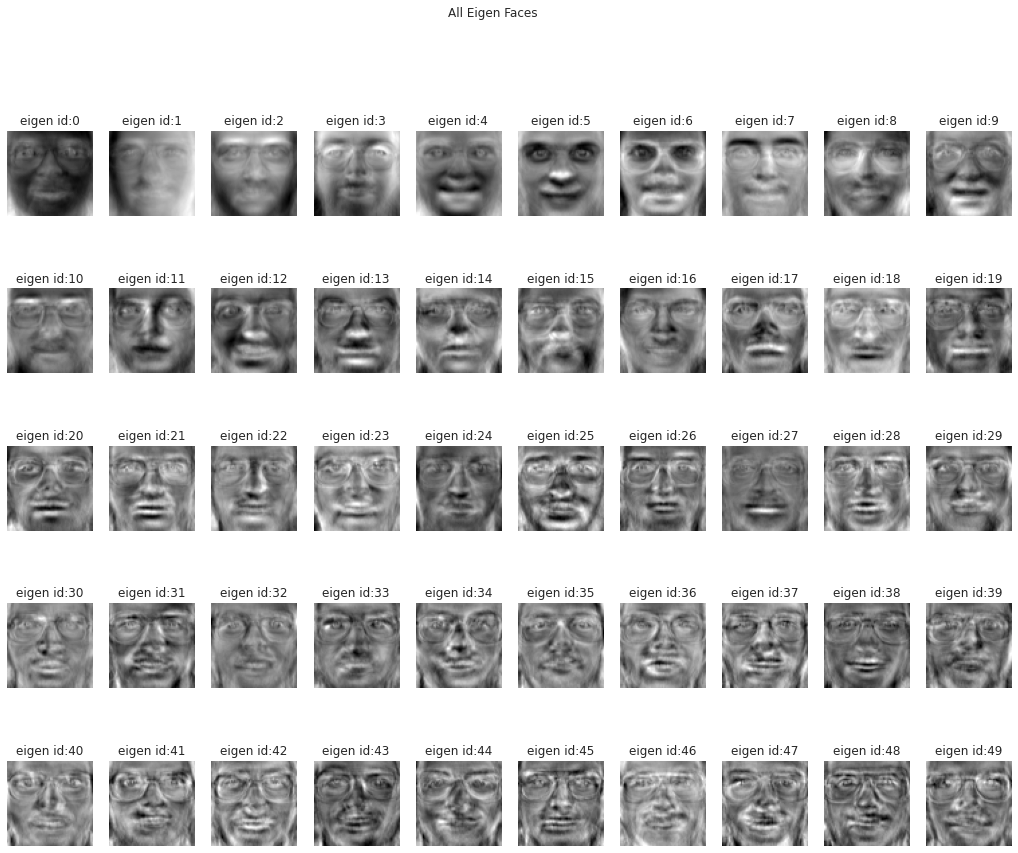

In [ ]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, img_data.shape[1], img_data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,14))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [ ]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [ ]:
clf = SVC()
clf.fit(X_train_pca, Y_train)
Y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(Y_test, Y_pred)))

accuracy score:0.97


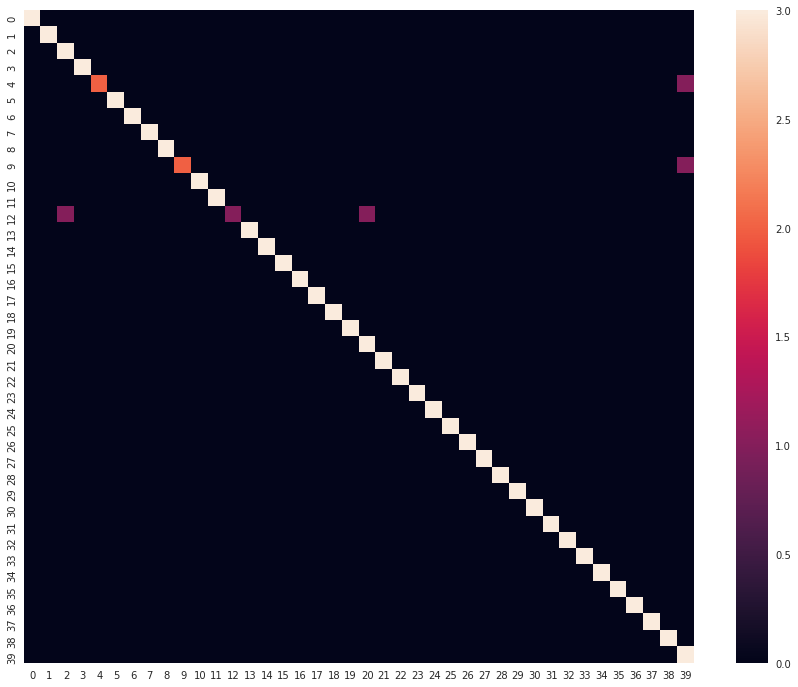

In [ ]:
import seaborn as sns
plt.figure(1, figsize=(15,12))
sns.heatmap(metrics.confusion_matrix(Y_test, Y_pred))

In [ ]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00    